#### CS164 Preclass Work for Session 5.2

### Equality Constraints with Lagrange Multipliers I
_Yoav Rabinovich, Feb 20_

----------------------

**(1)** _Use Lagrange Multipliers to find the global maximum and minimum values of $f(x, y) = x^2 + 2y^2 − 4y$, subject to the constraint $x^2 + y^2 = 9$. Note that no second derivative test is needed here - simply look at the function values at each critical point._

We define the Lagrangian: $\mathcal{L} = f(x,y)-\lambda (g(x,y)-c) = x^2 + 2y^2 − 4y - \lambda(x^2 + y^2 - 9)$.

We set its gradient to zero: $\nabla \mathcal{L} = \textbf{0}$, yielding the system of equations:

$$\nabla \mathcal{L} = \begin{bmatrix}
\mathcal{L}_x(x,y,\lambda)\\ 
\mathcal{L}_y(x,y,\lambda)\\
\mathcal{L}_\lambda(x,y,\lambda)
\end{bmatrix} = \begin{bmatrix}
2x-2\lambda x\\
4y -4 -2\lambda y\\
x^2+y^2-9
\end{bmatrix} = \begin{bmatrix}
0\\
0\\
0
\end{bmatrix}$$

which we then solve to yield four solutions: $(x^*,y^*,\lambda^*)=(\pm \sqrt{5}, 2, 1),(0, 3, 4/3),(0,-3,8/3)$. Plugging them into the cost function, we can classify the critical points we found: $f(\pm \sqrt{5},0) = 5, f(0,3) = 6, f(0,-3) = 30$. Therefore,subject to the constraint, the global maximum is 30 at $(0,-3)$, and the global minimua are 5 at $(\pm \sqrt{5},3)$.

**(2)** _A manufacturer’s production is modeled by the Cobb-Douglas function:_

$$f(x, y) = 100x^{3/4}y^{1/4}$$

_where $x$ represents the units of labor, $y$ represents the units of capital and $f(x, y)$ represents the production level. Each labor unit costs \\$200 and each capital unit costs \\$250. The total expenses for labor and capital cannot exceed \\$50,000._

_Given the form of the cost function, we can be sure that the maximum will occur when the labor and capital expenses are exactly at their maximum total value._

We formulate the constraint as $200x+250y=50,000 \rightarrow y=-\frac{4}{5}x+200$

**(a)** _Plot level sets of the production function and total cost constraint to graphically estimate the maximum production level._

In [0]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Production and constraint functions
f = lambda x,y: 100*(x**(3/4))*(y**(1/4))
g = lambda x: (-4/5)*x+200
g2 = lambda x: (-4/5)*x+205

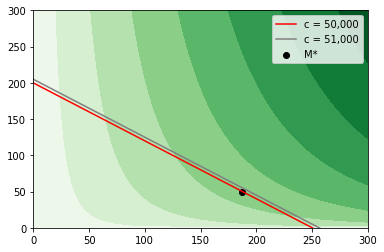

In [0]:
# Plotting
vrange = np.linspace(0,300,100)
X, Y = np.meshgrid(vrange, vrange)
Z = np.empty(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = f(X[i,j],Y[i,j])

plt.contourf(X,Y,Z,cmap="Greens")
plt.plot(vrange,[g(x) for x in vrange],c="r",label="c = 50,000")
plt.plot(vrange,[g2(x) for x in vrange],c="grey",label="c = 51,000")
plt.scatter(187.5,50,c="black",label="M*")
plt.legend()
plt.xlim(0,300)
plt.ylim(0,300)
plt.show()

**(b)** _Find the maximum production level exactly using the method of Lagrange
Multipliers._

As in problem (1), we define the Lagrangian using the cost and constraint functions from the problem introduction and set its gradient to zero to obtain a system of equations:

$$\mathcal{L} = f(x,y)-\lambda (g(x,y)-c) = 100x^{3/4}y^{1/4} - \lambda(200x+250y-5000)$$

$$\nabla \mathcal{L} = \begin{bmatrix}
\mathcal{L}_x(x,y,\lambda)\\ 
\mathcal{L}_y(x,y,\lambda)\\
\mathcal{L}_\lambda(x,y,\lambda)
\end{bmatrix} = \begin{bmatrix}
75x^{-1/4}y^{1/4}-200\lambda\\
25x^{3/4}y^{-3/4} -250\lambda\\
200x+250y-50000
\end{bmatrix} = \begin{bmatrix}
0\\
0\\
0
\end{bmatrix}$$

which we solve to find a single solution: $(x^*,y^*,\lambda^*)=(187.5, 50, \frac{3^{3/4}}{4 \sqrt{2} 5^{1/4}})$, which is a maximum based on our assumption in the problem introduction. We plot the solultion above. 

We find the maximum production by plugging $x$ and $y$ into the cost function: $f(187.5,50) = \$13,473.9$. (Assuming production is measured in dollar revenue).

**(c)** _Use the Lagrange Multipliers to estimate the increase in maximum production if we allowed the total expense threshold to increase to \\$51,000._

We know that the Lagrange multiplier we calculated, $\lambda^* = \frac{3^{3/4}}{4 \sqrt{2} 5^{1/4}}$, is the derivative of the maximum point at the solution with respect to the constraint: $\frac{dM^*(c)}{dc}=\lambda^*(c)$.

Using this knowledge, and assuming a linear relationship between $M^*$ and $c$, we can use the linear formula to find the revenue with a budget constraint of \\$51,000:

$$M^*(c) = \lambda^* c +C$$

We expect the intersection $C$ to be zero (no labor or capital, no revenue, from the cost function), but we can verify it by using the point at $(x^*,y^*,50000)$:

$$C = 13473.9-\frac{3^{3/4}}{4 \sqrt{2} 5^{1/4}}*50000 \approx 0$$

And therefore the maximum revenue with budget \\$51,000 is:

$$M^*(51000) = \frac{3^{3/4}}{4 \sqrt{2} 5^{1/4}} * 51000 \approx \\$13743.9$$.

$$\Delta M^* = M^*(51,000)-M^*(50,000) \approx \$269.48$$

Which might not be worth the investment.